## Using convex hull from opencv library to find out the borders of the csDNA origami to calculate the position of the robot

In [2]:
#import 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

3564.5
2352.0
1348.0
1185.0
1070.5


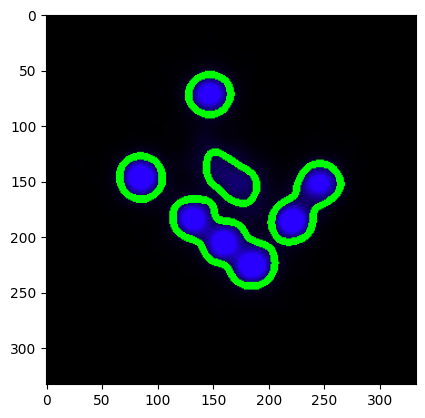

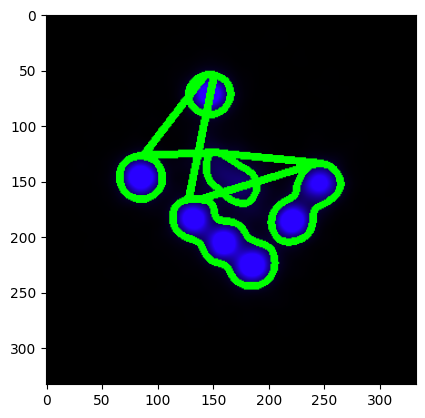

In [3]:
img_path = '/workspaces/CSDNA/Testing code/Robot Movement/Data/t=48avg.png'

# Load the images as an array from the Data folder 
img = cv.imread(img_path)
copy_1 = img.copy()

# Convert the image to grayscale
gray_1 = cv.cvtColor(copy_1, cv.COLOR_BGR2GRAY)

#apply a threshold to the image
ret,thresh_1 = cv.threshold(gray_1,20,255,cv.THRESH_TOZERO)

#find the contours of the image
contours_1, hierarchy = cv.findContours(thresh_1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#draw the contours on the image
cv.drawContours(copy_1, contours_1, -1, (0,255,0), 5)

#sorting the contours by area
contours_1 = sorted(contours_1, key = cv.contourArea, reverse = True)

#printing the area of each contour
for contour in contours_1 : 
    print(cv.contourArea(contour))

#display the image using matplotlib
plt.imshow(copy_1)
plt.show()

#concatenate the contours into a single contour
single_contour = np.concatenate(contours_1)

#using the single_contour to draw the contour on the image
cv.drawContours(copy_1, [single_contour], -1, (0,255,0), 5)

#display the image using matplotlib
plt.imshow(copy_1)
plt.show()


39.225677490234375


/tmp/ipykernel_1957/4108477020.py:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


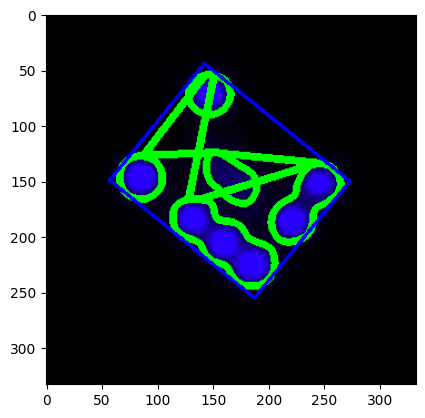

rect:  ((165.39166259765625, 150.09523010253906), (168.71804809570312, 135.58154296875), 39.225677490234375)


In [4]:
#using bounding rectangle to rotate the image to align properly
rect = cv.minAreaRect(single_contour)

box = cv.boxPoints(rect)
box = np.int0(box)

cv.drawContours(copy_1,[box],0,(0,0,255),2)

#printing the angle of rotation
print(rect[2])

plt.imshow(copy_1)
plt.show()
print("rect: ", rect)

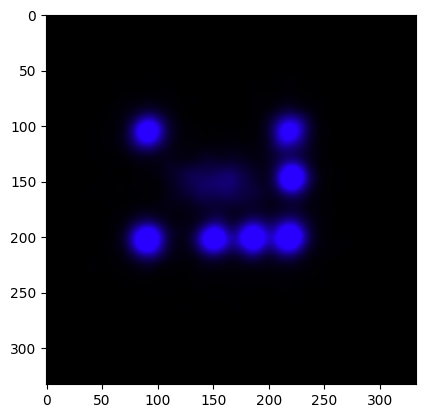

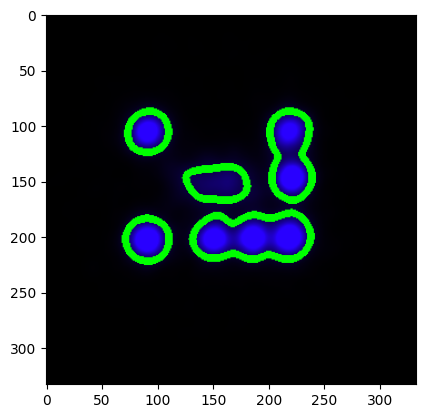

131 178


In [5]:
# Get the rotation angle and adjust it to ensure the longer side is parallel to the x-axis
angle = rect[2]
if rect[1][0] < rect[1][1]:
    angle += 90
rows,cols = img.shape[:2]
M = cv.getRotationMatrix2D((cols/2,rows/2),angle,1)
dst = cv.warpAffine(img,M,(cols,rows))

#making a copy of the rotated image
copy_2 = dst.copy()
copy_3 = dst.copy()

#showing the rotated image
plt.imshow(dst)
plt.show()

#drawing the contours on the rotated image copy_2
gray_2 = cv.cvtColor(copy_2, cv.COLOR_BGR2GRAY)
ret,thresh_2 = cv.threshold(gray_2,20,255,cv.THRESH_TOZERO)
contours_2, hierarchy = cv.findContours(thresh_2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(copy_2, contours_2, -1, (0,255,0), 5)

#sorting the contours by area
contours_2 = sorted(contours_2, key = cv.contourArea, reverse = True)

#showing the contours
plt.imshow(copy_2)
plt.show()

#finding the position of the first contour
x_1,y_1,w_1,h_1 = cv.boundingRect(contours_2[0])
print(x_1,y_1)


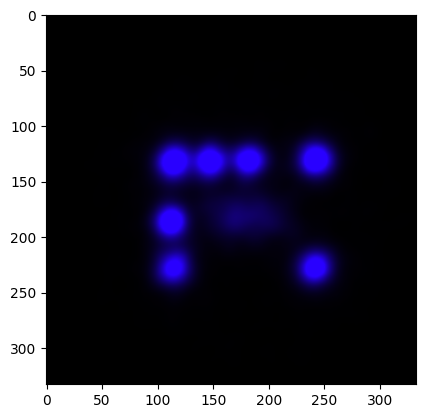

95 113


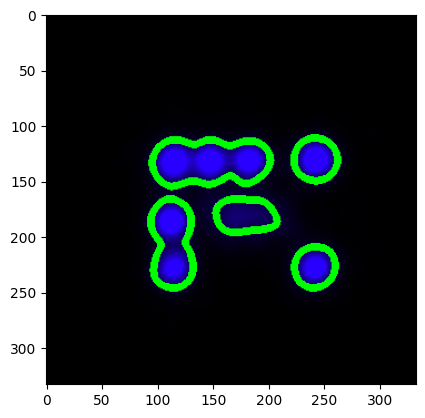

In [16]:
#rotating copy_3 by 180%
rows,cols = copy_3.shape[:2]
M = cv.getRotationMatrix2D((cols/2,rows/2),180,1)
dst_2 = cv.warpAffine(copy_3,M,(cols,rows))

#making a copy of the rotated image
copy_4 = dst_2.copy()

#showing the rotated image
plt.imshow(dst_2)
plt.show()

#drawing the contours on the rotated image copy_4
gray_3 = cv.cvtColor(copy_4, cv.COLOR_BGR2GRAY)
ret,thresh_3 = cv.threshold(gray_3,20,255,cv.THRESH_TOZERO)
contours_3, hierarchy = cv.findContours(thresh_3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(copy_4, contours_3, -1, (0,255,0), 5)

#sorting the contours by area
contours_3 = sorted(contours_3, key = cv.contourArea, reverse = True)

#printing the coordinates of the first contour
x_2,y_2,w_2,h_2 = cv.boundingRect(contours_3[0])
print(x_2,y_2)

#showing the contours
plt.imshow(copy_4)
plt.show()



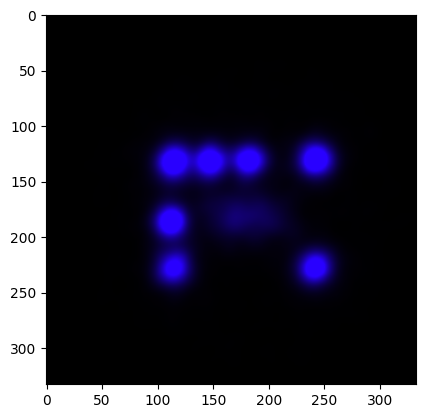

In [17]:
#if x_1, y_1 < x_2, y_2 then use final_img = dst else final_img = dst_2
if x_1 < x_2 and y_1 < y_2:
    final_img = dst
    
else:
    final_img = dst_2
    
#showing the final image
plt.imshow(final_img)
plt.show()



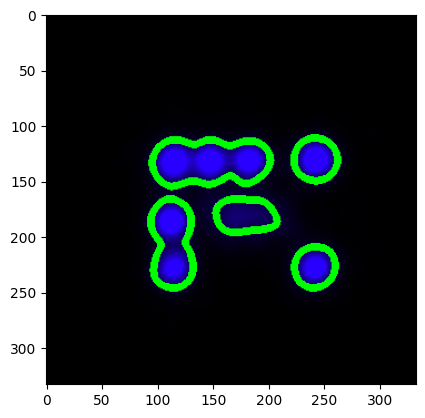

In [18]:
#contours on the final image
gray_4 = cv.cvtColor(final_img, cv.COLOR_BGR2GRAY)
ret,thresh_4 = cv.threshold(gray_4,20,255,cv.THRESH_TOZERO)
contours_4, hierarchy = cv.findContours(thresh_4, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(final_img, contours_4, -1, (0,255,0), 5)

#sorting the contours by area
contours_4 = sorted(contours_4, key = cv.contourArea, reverse = True)

#showing the contours
plt.imshow(final_img)
plt.show()


    


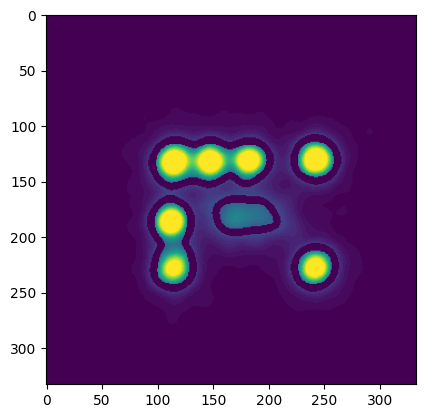

In [23]:
#generating heat map of the final image using pixel intensity values as the data
data = final_img[:,:,0]
plt.imshow(data)
plt.show()


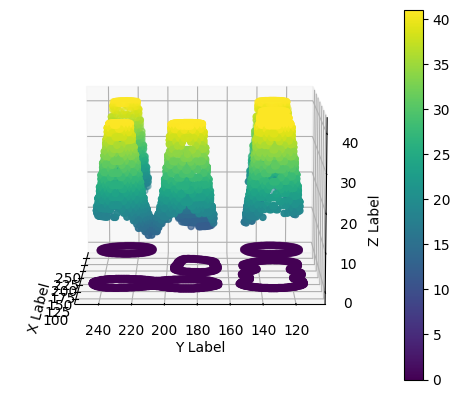

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = []
y = []
z = []

for i in range(0, len(data)):
    for j in range(0, len(data[i])):
        for contour in contours_4:
            if cv.pointPolygonTest(contour, (j, i), False) == 1:
                x.append(j)
                y.append(i)
                z.append(data[i][j])

# Scatter plot
sc = ax.scatter(x, y, z, c=z, cmap='viridis')

# Rotate the plot by 180 degrees
ax.view_init(azim=45, elev=10)  # You can adjust the 'elev' parameter as needed

# Adding labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show color bar
fig.colorbar(sc, ax=ax)

# Show plot
plt.show()



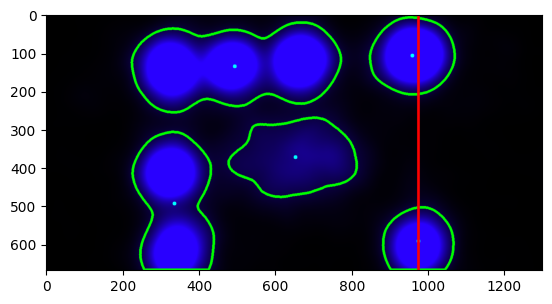

In [36]:
#drawing a line through the right most centers to find the direction of the robot
right_most_center = max(centers, key=lambda x: x[0])

#drawing a line 
cv.line(img, (right_most_center[0], 0), (right_most_center[0], img.shape[0]), (255, 0, 0), 5)

#display the image using matplotlib
plt.imshow(img)
plt.show()

Distance:  391.0051150560565
Angle:  36.57682716081769


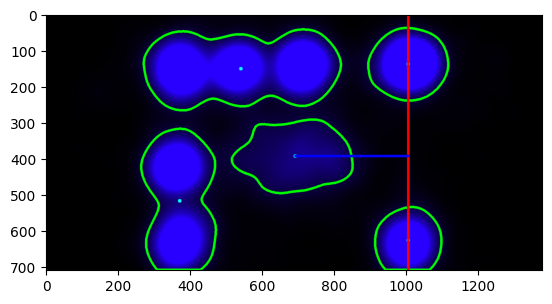

In [22]:
#finding the middle center in the center array
middle_center = centers[len(centers)//2]

#finding the distance between middle center and line through the right most center
distance = np.sqrt((right_most_center[0] - middle_center[0])**2 + (right_most_center[1] - middle_center[1])**2)


print("Distance: ", distance)

#finding the angle between the middle center of the image and the right line
angle = np.arctan2(right_most_center[1] - middle_center[1], right_most_center[0] - middle_center[0]) * 180 / np.pi

print("Angle: ", angle)

#drawing a line perpendicular to the right line through the middle center of the image
cv.line(img, middle_center, (right_most_center[0], middle_center[1]), (0, 0, 255), 5)

#display the image using matplotlib
plt.imshow(img)
plt.show()


In [ ]:
# take the intensity into account while finding the centers
# Finding the right line using the two right most centers
# Finding the ratio of the distance from the right line to the middle center and the left most center. 